In [75]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
#import libraries
import nltk
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
#import data
data = pd.read_csv('salary.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [78]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [79]:
data.shape

(377, 6)

In [80]:
data=data.dropna()

In [81]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [82]:
data.shape

(375, 6)

In [83]:
# Remove 'Senior' and 'Junior' from job titles
data['Job Title'] = data['Job Title'].str.replace('Senior', '').str.replace('Junior', '')

In [84]:
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
372,29.0,Female,Bachelor's,Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Business Analyst,15.0,150000.0
375,25.0,Male,Bachelor's,Data engineer,2.0,50000.0
376,27.0,Male,Master's,Data engineer,4.0,102000.0


In [85]:
data['Education Level'] = data['Education Level'].str.lower().str.rstrip("'s")
data['Job Title']=data['Job Title'].str.lower()

In [86]:
nltk.download('punkt')
stemmer = PorterStemmer()
data['Job Title'] = data['Job Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))
data['Education Level'] = data['Education Level'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,bachelor,softwar engin,5.0,90000.0
1,28.0,Female,master,data analyst,3.0,65000.0
2,45.0,Male,phd,manag,15.0,150000.0
3,36.0,Female,bachelor,sale associ,7.0,60000.0
4,52.0,Male,master,director,20.0,200000.0
...,...,...,...,...,...,...
372,29.0,Female,bachelor,project manag,2.0,40000.0
373,34.0,Male,bachelor,oper coordin,7.0,90000.0
374,44.0,Female,phd,busi analyst,15.0,150000.0
375,25.0,Male,bachelor,data engin,2.0,50000.0


In [88]:
selected_columns = ['Years of Experience', 'Education Level','Job Title', 'Salary']
data = data[selected_columns]

In [89]:
data.head()

,Years of Experience,Education Level,Job Title,Salary
0,5.0,bachelor,softwar engin,90000.0
1,3.0,master,data analyst,65000.0
2,15.0,phd,manag,150000.0
3,7.0,bachelor,sale associ,60000.0
4,20.0,master,director,200000.0


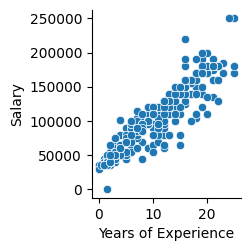

In [90]:
sns.pairplot(y_vars = 'Salary', x_vars = 'Years of Experience' ,data = data)

In [91]:
data.shape

(375, 4)

In [92]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [93]:
X[:5]

,Years of Experience,Education Level,Job Title
0,5.0,bachelor,softwar engin
1,3.0,master,data analyst
2,15.0,phd,manag
3,7.0,bachelor,sale associ
4,20.0,master,director


In [94]:
# Preprocess categorical feature 'Education Level'
categorical_features = ['Education Level','Job Title']
numeric_features = ['Years of Experience']

In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [96]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# Combine preprocessing and modeling steps into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

In [98]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [99]:
X_train.shape

(262, 3)

In [100]:
X_test.shape

(113, 3)

In [101]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education Level',
                                                   'Job Title'])])),
                ('model', LinearRegression())])

In [102]:
import joblib
joblib.dump(pipeline, 'trained.pkl')

['trained.pkl']

In [103]:
# Predict salaries for the test set
y_pred = pipeline.predict(X_test)

In [104]:
# Print the R-squared score (Coefficient of Determination)
print(f'R-squared score: {pipeline.score(X_test, y_test):.2f}')

R-squared score: 0.90


In [120]:
# User input: Experience and Education Level
user_experience = float(input("Enter years of experience: "))
user_education = input("Enter education level: ")
job_title=input("Enter job title : ").lower()

Enter years of experience: 5.00
Enter education level: bachelor
Enter job title : data engineer


In [121]:
stemmed_job_title= ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(job_title)])
stemmed_user_education= ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(user_education)])
update_uder_education=stemmed_user_education.lower().rstrip("s")
update_job_title=stemmed_job_title.lower()

In [122]:
# Create a DataFrame for user input
user_data = pd.DataFrame({'Years of Experience': [user_experience],
                          'Education Level': [update_uder_education],
                          'Job Title': [update_job_title]})

In [123]:
user_salary_pred = pipeline.predict(user_data)

In [124]:
print(f"Predicted Salary: {user_salary_pred[0]:.2f} Rupees")

Predicted Salary: 69331.15 Rupees
